# Importing important libraries 

In [2]:
#Import the relevant libraries
import pandas as pd
import numpy as np                     # For mathematical calculations               
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import seaborn as sns # For data visualization
sns.set_style('whitegrid')
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Importing Dataset 

In [3]:
#Load data onto memmory using the pandas library
data = pd.read_csv("https://raw.githubusercontent.com/trupti1605/GitHub-example/master/2010-capitalbikeshare-tripdata.csv")                  

In [4]:
data.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,1012,2010-09-20 11:27:04,2010-09-20 11:43:56,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member
1,61,2010-09-20 11:41:22,2010-09-20 11:42:23,31209,1st & N St SE,31209,1st & N St SE,W00032,Member
2,2690,2010-09-20 12:05:37,2010-09-20 12:50:27,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member
3,1406,2010-09-20 12:06:05,2010-09-20 12:29:32,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member
4,1413,2010-09-20 12:10:43,2010-09-20 12:34:17,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member


In [5]:
data.describe()

,Duration,Start station number,End station number
count,115597.000000,115597.000000,115597.000000
mean,1254.649956,31266.213431,31268.042250
std,2914.317998,187.645048,186.194316
min,60.000000,31000.000000,31000.000000
25%,403.000000,31110.000000,31111.000000
50%,665.000000,31213.000000,31214.000000
75%,1120.000000,31301.000000,31238.000000
max,85644.000000,31805.000000,31805.000000


In [9]:
data.isnull().sum()

Duration                0
Start date              0
End date                0
Start station number    0
Start station           0
End station number      0
End station             0
Bike number             0
Member type             0
dtype: int64

# Bar plot 

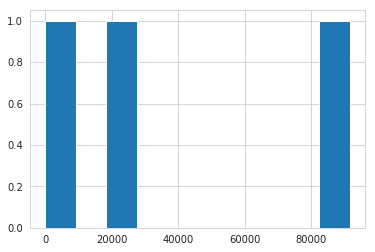

In [11]:
data['Member type'].value_counts().hist()

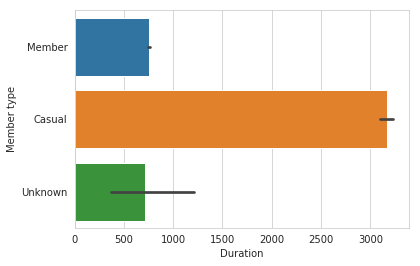

In [20]:
sns.barplot(x=data['Duration'],y=data ['Member type'])

In [11]:
# Assign X and y
x= data.iloc[:, [0, 3, 5]].values 
y = data.iloc[:, -1].values

In [13]:
from sklearn.preprocessing import LabelEncoder
t= LabelEncoder()
y = t.fit_transform(y.flatten())

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
#1. Splitting X,y into Train & Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Random Forest Classifier 

In [17]:
from sklearn.ensemble import RandomForestClassifier 
des_class=DecisionTreeClassifier()
des_class.fit(x_train,y_train)
des_predict=des_class.predict(x_test)
print(classification_report(y_test,des_predict))
accuracy3=des_class.score(x_test,y_test)
print(accuracy3*100,'%')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

              precision    recall  f1-score   support

      Casual       0.53      0.54      0.54      4874
      Member       0.88      0.87      0.87     18246
     Unknown       0.00      0.00      0.00         0

   micro avg       0.80      0.80      0.80     23120
   macro avg       0.47      0.47      0.47     23120
weighted avg       0.80      0.80      0.80     23120

80.08650519031141 %


# Logistic Regression 

In [19]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix
logistic = LogisticRegression()
logistic.fit(x_train,y_train)
y_pred=logistic.predict(x_test)
print(classification_report(y_test,y_pred)) 
accuracy1=logistic.score(x_test,y_test)
print (accuracy1*100,'%')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

              precision    recall  f1-score   support

      Casual       0.90      0.34      0.49      4874
      Member       0.85      0.99      0.91     18246

   micro avg       0.85      0.85      0.85     23120
   macro avg       0.87      0.66      0.70     23120
weighted avg       0.86      0.85      0.82     23120

85.20761245674741 %
